# Dust

Cometary dust comae are presently modeled with the Afρ quantity of A'Hearn et al. (1984), and the thermal emission corollary, εfρ, of Kelley et al. (2013).  For photometry of a cometary coma within a circular aperture:

* *A* is the albedo of the dust,
* *f* is the filling factor of the dust in the aperture,
* *ρ* is the aperture radius in units of length (at the distance of the comet).

The `Afrho` and `Efrho` classes are derived from astropy's `Quantity`, and have units of length:

In [1]:
import astropy.units as u
from sbpy.activity import Afrho, Efrho

afrho = Afrho(1000 * u.cm)
print(afrho)

1000.0 cm


In [2]:
efrho = Efrho(3.5 * afrho)
print(efrho)

3500.0 cm


With bandpass or wavelength, aperture radius, helocentric distance, and observer-target distance, we can convert `Afrho` and `Efrho` objects into spectral flux density:

In [3]:
from sbpy.data import Ephem

eph = Ephem.from_mpc('C/2017 K2')
aper = 5 * u.arcsec
m = afrho.to_fluxd('LSST r', aper, eph, unit=u.ABmag)
print(m)

14.737360509904782 mag(AB)


In [4]:
roundtrip = Afrho.from_fluxd('LSST r', m, aper, eph)
print(f'{m} --> {roundtrip}')

14.737360509904782 mag(AB) --> 1000.0 cm


Here, the conversion was done with the bandpass specified by name, using the current solar flux density lookup table in `sbpy.calib.solar_fluxd` (see notebook #2 from this tutorial).

---

Plot the spectrum of the comet, from 0.3 to 30 μm:

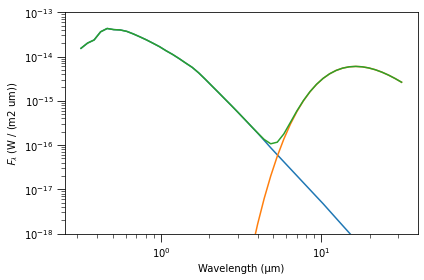

In [5]:
import numpy as np
import matplotlib.pyplot as plt

wave = np.logspace(-0.5, 1.5) * u.um
fsca = afrho.to_fluxd(wave, aper, eph)
ftherm = efrho.to_fluxd(wave, aper, eph)

ax = plt.gca()
ax.plot(wave, fsca, label='scattered')
ax.plot(wave, ftherm, label='thermal')
ax.plot(wave, fsca + ftherm, label='total')
plt.setp(ax, xscale='log', yscale='log', ylim=(1e-18, 1e-13), xlabel='Wavelength (μm)', ylabel=f'$F_\lambda$ ({fsca.unit})')
plt.tight_layout()